Valori mancanti per colonna 
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

--- INFO DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

--- DESCRIZIONE STATISTICA ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  2064

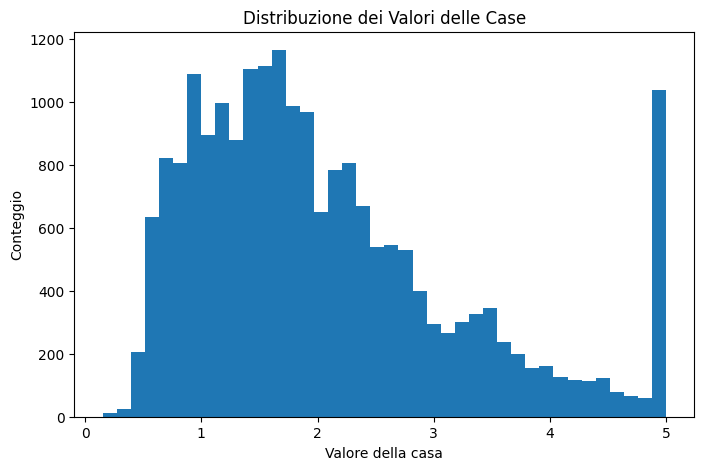

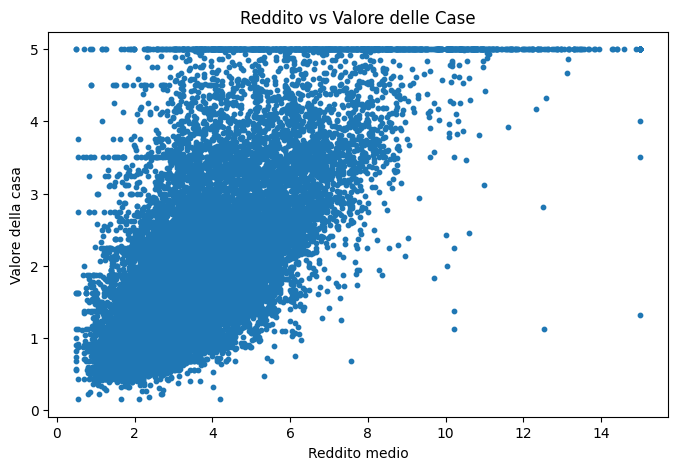

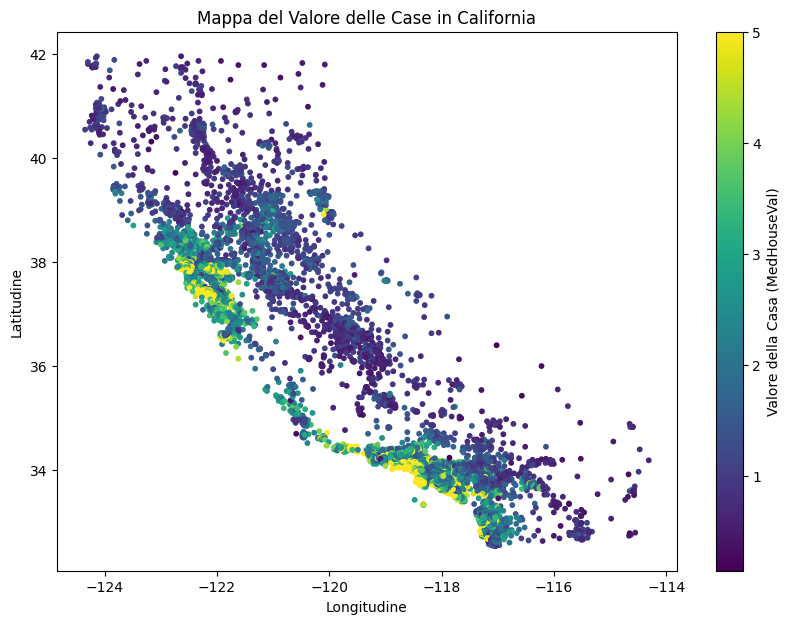

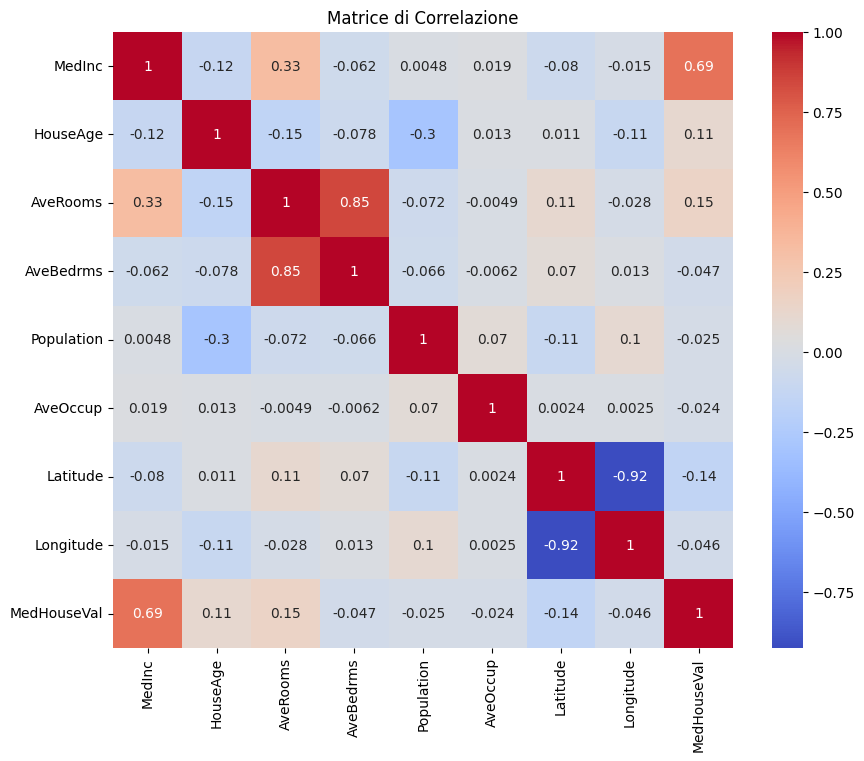

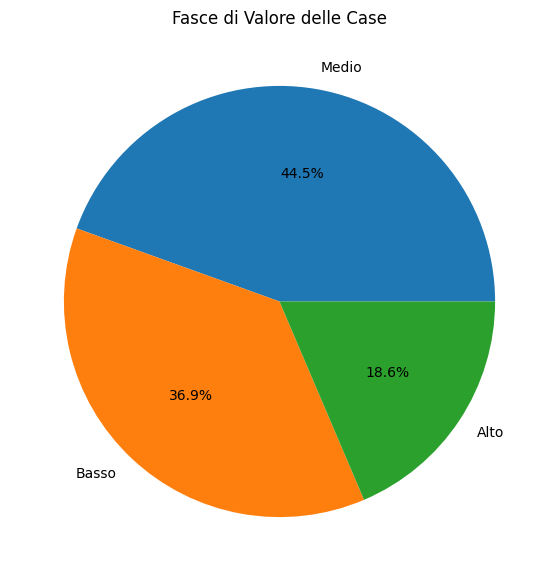

In [ ]:
import matplotlib.pyplot as plt   
import seaborn as sns            
import pandas as pd               

# Caricamento del dataset dal file CSV
df = pd.read_csv('california_housing_data.csv')  # Legge il CSV e lo carica in un DataFrame

# Controllo dei valori mancanti per ogni colonna
print("Valori mancanti per colonna ")
print(df.isnull().sum())  # isnull() crea un booleano True/False per i NaN, sum() conta i valori mancanti

# --- INFO GENERALI SUL DATASET ---
print("\n--- INFO DEL DATASET ---")
print(df.info())  # Mostra tipo di dato, numero righe, valori nulli, memoria usata

# --- DESCRIZIONE STATISTICA ---
print("\n--- DESCRIZIONE STATISTICA ---")
print(df.describe())  # Mostra media, min, max, quartili, std per colonne numeriche

# --- ANTEPRIMA DEL DATASET ---
print("\n--- PRIME 5 RIGHE ---")
print(df.head())  # Mostra le prime 5 righe del DataFrame

print("\n------------------------------------------------------")

# --- PULIZIA DATI ---
# Rimuovo le righe completamente vuote
df = df.dropna(how="all")  # Se una riga è tutta NaN, la elimina

# --- GRAFICO 1: ISTOGRAMMA DEI VALORI DELLE CASE ---
plt.figure(figsize=(8,5))  # Dimensione del grafico
plt.hist(df['MedHouseVal'], bins=40)  # Istogramma con 40 barre
plt.title("Distribuzione dei Valori delle Case")  # Titolo del grafico
plt.xlabel("Valore della casa")  # Etichetta asse X
plt.ylabel("Conteggio")  # Etichetta asse Y
plt.show()  # Mostra il grafico

# --- GRAFICO 2: SCATTER REDDITO VS VALORE CASE ---
plt.figure(figsize=(8,5))
plt.scatter(df['MedInc'], df['MedHouseVal'], s=10)  # Scatter plot con punti piccoli (s=10)
plt.title("Reddito vs Valore delle Case")
plt.xlabel("Reddito medio")
plt.ylabel("Valore della casa")
plt.show()

# --- GRAFICO 3: SCATTER GEOGRAFICO DEL VALORE CASE ---
plt.figure(figsize=(10,7))
plt.scatter(df['Longitude'], df['Latitude'], 
            c=df['MedHouseVal'], s=10)  # Colore in base al valore delle case
plt.colorbar(label="Valore della Casa (MedHouseVal)")  # Barra colore
plt.title("Mappa del Valore delle Case in California")
plt.xlabel("Longitudine")
plt.ylabel("Latitudine")
plt.show()

# --- GRAFICO 4: HEATMAP DELLE CORRELAZIONI ---
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Matrice di correlazione tra colonne numeriche
plt.title("Matrice di Correlazione")
plt.show()

# --- CREAZIONE DI UNA NUOVA COLONNA PER PIE CHART ---
df['Fascia_Valore'] = pd.cut(
    df['MedHouseVal'],  # Colonna da suddividere
    bins=[0, 1.5, 3, df['MedHouseVal'].max()],  # Definizione intervalli (basso, medio, alto)
    labels=['Basso', 'Medio', 'Alto']  # Etichette da assegnare
)

# Conteggio del numero di case in ogni fascia di valore
counts = df['Fascia_Valore'].value_counts()  # Conta quante case rientrano in ogni fascia

# --- GRAFICO 5: PIE CHART DELLE FASCE DI VALORE ---
plt.figure(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # Pie chart con percentuali
plt.title("Fasce di Valore delle Case")
plt.show()
